In [39]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt
import graphviz
from sklearn.utils.fixes import loguniform
import scipy.stats as ss

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.utils.fixes import loguniform
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [4]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [7]:
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=10)
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [10]:
res = cross_validate(logreg, iris['data'], iris['target'], return_train_score=True, cv=5)
res

{'fit_time': array([0.03471446, 0.02602267, 0.0160141 , 0.01701546, 0.01701498]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [15]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris['data'], iris['target'], cv=kfold)

array([0.98, 0.96, 0.96])

In [23]:
skfold = StratifiedKFold(n_splits=5)
cross_val_score(logreg, iris['data'], iris['target'], cv=skfold)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [25]:
loo = LeaveOneOut()
cross_val_score(logreg, iris['data'], iris['target'], cv=loo).mean()

0.9666666666666667

In [33]:
shuffle_split = StratifiedShuffleSplit(train_size=0.6, test_size=0.2, n_splits=10, random_state=0)
cross_val_score(logreg, iris['data'], iris['target'], cv=shuffle_split).mean()

0.9566666666666667

In [34]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
cross_val_score(logreg, X, y, cv=StratifiedGroupKFold(n_splits=3), groups=groups)

array([0.75      , 0.66666667, 0.8       ])

In [36]:
rskfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=0)
cross_val_score(logreg, iris['data'], iris['target'], cv=rskfold).mean()

0.9626666666666669

In [50]:
np.logspace(-3, 1, 5)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [53]:
param_grid = {'C':np.logspace(-3, 1, 5), 'gamma':np.logspace(-3, 1, 5)}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True).fit(X_train, y_train)
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'C': 10.0, 'gamma': 0.1}, 0.9731225296442687, 0.9736842105263158)

In [54]:
grid.best_estimator_

SVC(C=10.0, gamma=0.1)

In [58]:
results = pd.DataFrame(grid.cv_results_)
results.T.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.000601,0.001001,0.000801,0.000801,0.000801,0.001001,0.000401,0.0006,0.001001,0.000801,...,0.0004,0.000601,0.0004,0.000601,0.000801,0.0006,0.000601,0.0002,0.000601,0.0006
std_fit_time,0.00049,0.0,0.0004,0.0004,0.0004,0.0,0.000491,0.00049,0.0,0.0004,...,0.000491,0.00049,0.00049,0.00049,0.0004,0.00049,0.000491,0.0004,0.00049,0.00049
mean_score_time,0.0004,0.0002,0.0004,0.0004,0.000401,0.0,0.0006,0.0004,0.0,0.0002,...,0.000601,0.0002,0.0004,0.0,0.0002,0.0002,0.0002,0.0004,0.0,0.000624
std_score_time,0.00049,0.0004,0.00049,0.000491,0.000491,0.0,0.00049,0.00049,0.0,0.0004,...,0.00049,0.0004,0.00049,0.0,0.0004,0.0004,0.0004,0.00049,0.0,0.000511
param_C,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,...,1.0,1.0,1.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0


In [66]:
scores = results['mean_test_score'].astype('float64').values.reshape(5, 5)
scores

array([[0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316],
       [0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316],
       [0.36640316, 0.69644269, 0.90158103, 0.95533597, 0.36640316],
       [0.69644269, 0.93794466, 0.96403162, 0.94664032, 0.9284585 ],
       [0.93794466, 0.96403162, 0.97312253, 0.94624506, 0.91106719]])

Text(34.0, 0.5, 'C')

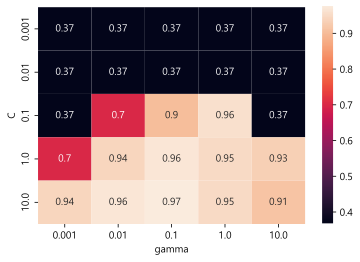

In [70]:
sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('gamma')
plt.ylabel('C')

In [71]:
param_grid = [{'kernel':['rbf'], 'C':np.logspace(-3, 1, 5), 'gamma':np.logspace(-3, 1, 5)}, {'kernel':['linear'], 'C':np.logspace(-3, 1, 5)}]

In [72]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True).fit(X_train, y_train)
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'},
 0.9731225296442687,
 0.9736842105263158)

In [75]:
param_dist = {'kernel':['rbf'], 'C':ss.loguniform(1, 10), 'gamma':ss.loguniform(0.01, 0.1)}

In [76]:
rand = RandomizedSearchCV(SVC(), param_distributions=param_dist, cv=5, n_iter=20, n_jobs=-1).fit(X_train, y_train)
rand.best_params_, rand.best_score_, rand.score(X_test, y_test)

({'C': 3.912339767015907, 'gamma': 0.09981408412461906, 'kernel': 'rbf'},
 0.9727272727272727,
 0.9736842105263158)

In [86]:
digits = load_digits()
y = digits['target'] == 9
X = digits['data']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [88]:
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy.score(X_test, y_test)

0.8955555555555555

In [105]:
X_resampled, y_resampled = SMOTE(sampling_strategy='minority', k_neighbors=3, random_state=0).fit_resample(X, y)

In [106]:
len(y_resampled), len(y)

(3234, 1797)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [108]:
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy.score(X_test, y_test)

0.4919653893695921

In [109]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9913473423980222

In [110]:
np.bincount(y), np.bincount(y_resampled)

(array([1617,  180], dtype=int64), array([1617, 1617], dtype=int64))